In [2]:
import pandas as pd

trainp = r"C:\Users\R\Downloads\traffic\Train.csv"
testp= r"C:\Users\R\Downloads\traffic\Test.csv"
metap=r"C:\Users\R\Downloads\traffic\Meta.csv"

train = pd.read_csv(trainp)
test = pd.read_csv(testp)
meta = pd.read_csv(metap)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [9]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


In [7]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\r\anaconda3\lib\site-packages (2.20.0)



In [11]:
import os
os.chdir(r"c:\Users\R\Downloads\traffic")  

print("Now working in:", os.getcwd())
print("Folders here:", os.listdir("."))

Now working in: c:\Users\R\Downloads\traffic
Folders here: ['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']


In [12]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

IMG_size = 32

Base_dir = "."

def load_data(df):
  images = []
  labels = []
  
  for i, row in df.iterrows():
    img_path = os.path.join(Base_dir, row['Path'])  
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_size,IMG_size))
    images.append(img)
    labels.append(row['ClassId'])
    
  x = np.array(images, dtype = 'float32') / 255.0
  y = to_categorical(labels, num_classes=len(meta))
  
  return x, y


x_train, y_train = load_data(train)
x_test, y_test = load_data(test)

print("Train data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

Train data shape: (39209, 32, 32, 3) (39209, 43)
Test data shape: (12630, 32, 32, 3) (12630, 43)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_CNN(input_shape=(32,32,3), num_classes=43):
  model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    MaxPooling2D(pool_size = (2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
        
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(num_classes, activation = 'softmax')
  ])
  
  model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
  return model

cnn_model = create_CNN()
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training = cnn_model.fit(x_train,y_train,
                         epochs = 15,
                         batch_size = 64,
                         validation_data = (x_test,y_test),
                         verbose = 1)

Epoch 1/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4777 - loss: 1.8560 - val_accuracy: 0.8371 - val_loss: 0.6103
Epoch 2/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8702 - loss: 0.4310 - val_accuracy: 0.9173 - val_loss: 0.3046
Epoch 3/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9347 - loss: 0.2184 - val_accuracy: 0.9360 - val_loss: 0.2480
Epoch 4/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9582 - loss: 0.1397 - val_accuracy: 0.9470 - val_loss: 0.2098
Epoch 5/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9709 - loss: 0.1005 - val_accuracy: 0.9485 - val_loss: 0.2026
Epoch 6/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9753 - loss: 0.0823 - val_accuracy: 0.9509 - val_loss: 0.1779
Epoch 7/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9792 - loss: 0.0689 - val_accuracy: 0.9523 - val_loss: 0.2237
Epoch 8/15
613/613 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9821 - loss: 0.0576 - val_ac

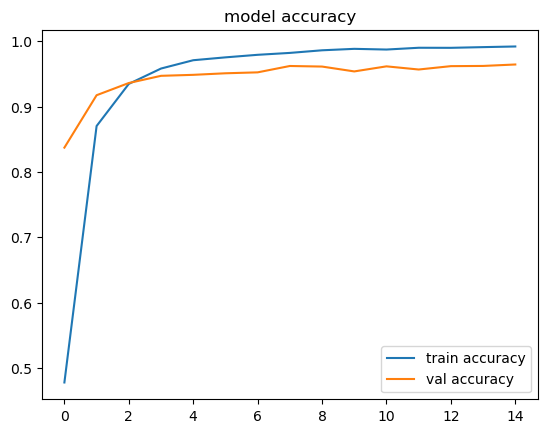

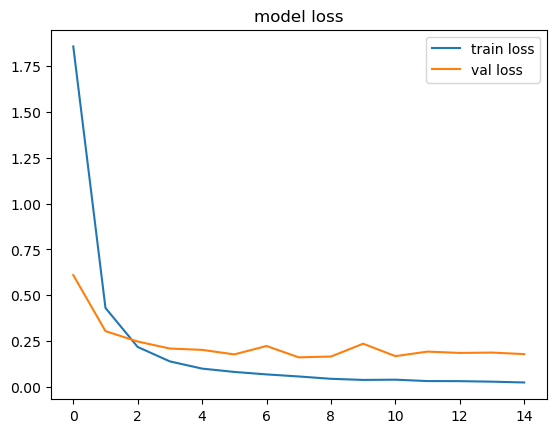

In [17]:
import matplotlib.pyplot as plt

plt.plot(training.history['accuracy'], label = 'train accuracy')
plt.plot(training.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.title('model accuracy')
plt.show()

plt.plot(training.history['loss'], label = 'train loss')
plt.plot(training.history['val_loss'], label = 'val loss')
plt.legend()
plt.title('model loss')
plt.show()

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


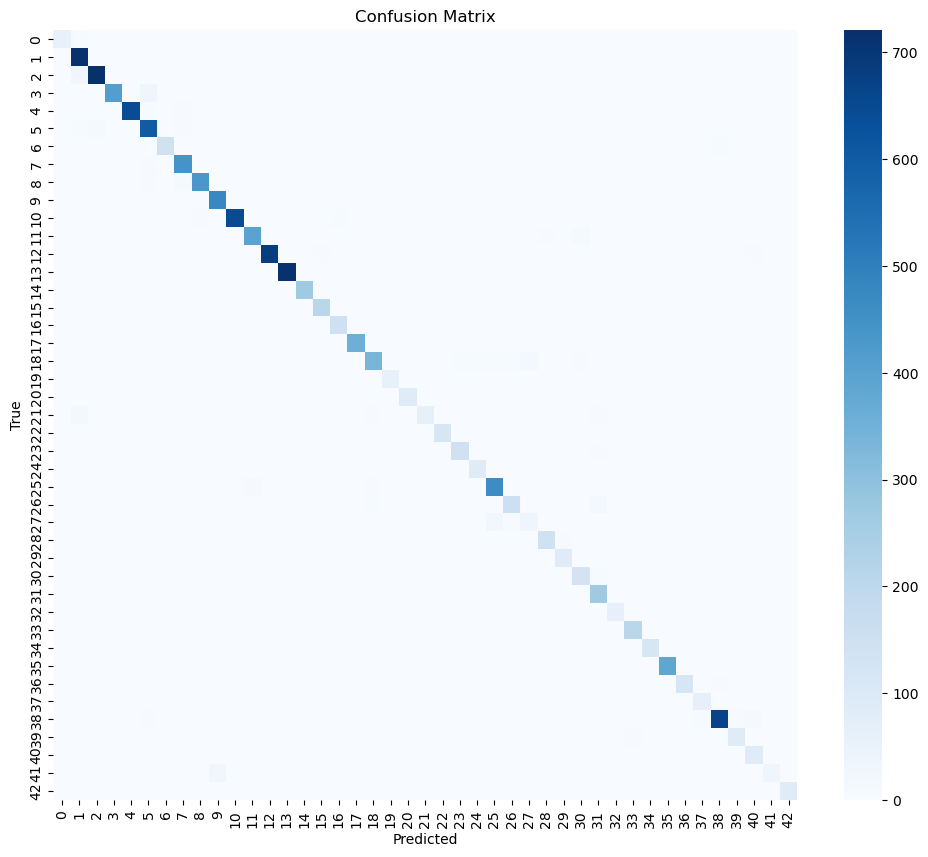

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        60
           1       0.92      1.00      0.96       720
           2       0.98      0.96      0.97       750
           3       0.99      0.92      0.95       450
           4       0.99      0.98      0.98       660
           5       0.92      0.96      0.94       630
           6       0.99      0.94      0.96       150
           7       0.95      0.99      0.97       450
           8       0.98      0.96      0.97       450
           9       0.94      0.99      0.97       480
          10       1.00      0.98      0.99       660
          11       0.97      0.95      0.96       420
          12       1.00      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      0.99      0.99       210
          16       0.94      1.00      0.97       150
          17       1.00    

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

y_pred = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred_classes))


In [19]:
cnn_model.save("traffic_sign_cnn.h5")
print("✅ Model saved as traffic_sign_cnn.h5")


✅ Model saved as traffic_sign_cnn.h5
